# Flight Price Project

In this project, an analysis is conducted based on flight reservation records from various customers. The data has been extracted from [this link](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data). It pertains to flights between February 11 and March 31, 2022.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Estilo global de Matplotlib
plt.style.use('ggplot')  

# Ajustes de configuración
plt.rcParams.update({
    'figure.figsize': (10, 6),        # Tamaño estándar de las figuras
    'axes.titlesize': 16,             # Tamaño de título de los ejes
    'axes.labelsize': 14,             # Tamaño de etiquetas de los ejes
    'xtick.labelsize': 12,            # Tamaño de etiquetas de las marcas de los ejes
    'ytick.labelsize': 12,
    'legend.fontsize': 12,            # Tamaño de fuente de la leyenda
    'axes.titleweight': 'bold',       # Negrita en los títulos de los ejes
    'axes.labelweight': 'bold',       # Negrita en las etiquetas de los ejes
    'axes.spines.top': False,         # Quita el borde superior
    'axes.spines.right': False,       # Quita el borde derecho
    'figure.dpi': 100,                # Resolución
    'savefig.dpi': 300,               # Resolución para guardar figuras
    'figure.autolayout': True,        # Ajuste automático de la figura para evitar superposición
})

# Configuración de estilo de Seaborn
sns.set_theme(
    style="darkgrid",                # Fondo con cuadrícula blanca
    palette="deep",                   # Paleta de colores vistosa
    font="sans-serif",                # Fuente general
    font_scale=1.1                    # Escala de tamaño de fuente
)

# Personalización adicional (para mejorar el contraste)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

In [3]:
path =  r'C:\Users\mateo\OneDrive\Escritorio\Ciencia de datos\Proyectos\Flight Price Prediction'

In [4]:
business = pd.read_csv(path + r'\business.csv')
economy = pd.read_csv(path + r'\economy.csv')


We have two files where the reservations have been classified according to the desired travel class. We will perform a quick cleaning process on these files to start the analysis as soon as possible.

Let's first describe the fields we have:
- **date**: Flight date
- **airline**: Name of the airline
- **ch_code**: Flight code (according to the airline)
- **num_code**: Flight number
- **dept_time**: Departure time
- **from**: Origin city
- **time_taken**: Duration of the flight
- **stop**: Number of stops
- **arr_time**: Arrival time
- **to**: Destination city
- **price**: Flight price

In [5]:
business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [6]:
economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


### Merging the DataFrames

The first step we will take, considering that both files have exactly the same number of columns, is to merge them into a single file. After this, we will begin with the cleaning transformations.

In [7]:
business['class'] = 'Business'
economy['class'] = 'Economy'

In [8]:
data = pd.concat([economy, business], ignore_index= True)

### General study

In [9]:
data.shape

(300261, 12)

In [10]:
data.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
300256,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",Business
300257,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",Business
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",Business
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",Business
300260,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"81,585",Business


In [11]:
data.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

In [12]:
data.dtypes

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
class         object
dtype: object

In [13]:
data.duplicated().sum()

np.int64(2)

There are two duplicated rows, which is not possible because a flight could not have flown two times in the same date and time so we will drop them 

In [14]:
data.drop_duplicates(inplace= True)

In [15]:
# We will concatenate the flight code and fligh number into a single column
data['flight'] = data['ch_code'].str.cat(data['num_code'].astype(str), sep='-')

In [16]:
data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy,SG-8709
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy,SG-8157
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy,I5-764
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy,UK-995
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy,UK-963


In [17]:
data.drop('ch_code', axis= 1, inplace= True)
data.drop('num_code', axis= 1, inplace= True)

In [18]:
# Some columns are renamed to give them better meaning
data.rename(columns= {'from': 'source_city', 'to': 'destination_city'}, inplace = True)

In [19]:
# Let's create a function to convert the departure and arrival times into a categorical variable.
def day_interval(horas):
    if 4 <= horas < 8:
        return 'Early Morning'
    elif 8 <= horas < 12:
        return 'Morning'
    elif 12 <= horas < 17:
        return 'Afternoon'
    elif 17 <= horas < 21:
        return 'Evening'
    else:
        return 'Night'

In [20]:
data['departure_time'] = pd.to_numeric(data['dep_time'].str.split(':').str[0]).apply(day_interval)

In [21]:
data['arrival_time'] = pd.to_numeric(data['arr_time'].str.split(':').str[0]).apply(day_interval)

In [22]:
data.drop('dep_time', axis= 1, inplace= True)
data.drop('arr_time', axis= 1, inplace= True)

In [23]:
data.head()

,date,airline,source_city,time_taken,stop,destination_city,price,class,flight,departure_time,arrival_time
0,11-02-2022,SpiceJet,Delhi,02h 10m,non-stop,Mumbai,"5,953",Economy,SG-8709,Evening,Night
1,11-02-2022,SpiceJet,Delhi,02h 20m,non-stop,Mumbai,"5,953",Economy,SG-8157,Early Morning,Morning
2,11-02-2022,AirAsia,Delhi,02h 10m,non-stop,Mumbai,"5,956",Economy,I5-764,Early Morning,Early Morning
3,11-02-2022,Vistara,Delhi,02h 15m,non-stop,Mumbai,"5,955",Economy,UK-995,Morning,Afternoon
4,11-02-2022,Vistara,Delhi,02h 20m,non-stop,Mumbai,"5,955",Economy,UK-963,Morning,Morning


In [24]:
# A function is created to express the flight duration in hours (as a decimal number).
def minutos_a_horas(row):
    horas, minutos = row.split('h ')
    minutos = minutos.replace('m','')
    
    # We need to use a try-except block because there are certain rows that already have the hours in decimal format and the minutes as 0
    try:
        horas_dec = int(horas) + int(minutos)/60
        return round(horas_dec, 2)
    except:
        return round(float(horas), 2)

In [25]:
data['duration'] = data['time_taken'].apply(minutos_a_horas)

In [26]:
data.head()

,date,airline,source_city,time_taken,stop,destination_city,price,class,flight,departure_time,arrival_time,duration
0,11-02-2022,SpiceJet,Delhi,02h 10m,non-stop,Mumbai,"5,953",Economy,SG-8709,Evening,Night,2.17
1,11-02-2022,SpiceJet,Delhi,02h 20m,non-stop,Mumbai,"5,953",Economy,SG-8157,Early Morning,Morning,2.33
2,11-02-2022,AirAsia,Delhi,02h 10m,non-stop,Mumbai,"5,956",Economy,I5-764,Early Morning,Early Morning,2.17
3,11-02-2022,Vistara,Delhi,02h 15m,non-stop,Mumbai,"5,955",Economy,UK-995,Morning,Afternoon,2.25
4,11-02-2022,Vistara,Delhi,02h 20m,non-stop,Mumbai,"5,955",Economy,UK-963,Morning,Morning,2.33


Let's fix the 'stop' column

In [27]:
data['stop'] = data['stop'].str.strip()

In [28]:
data['stop'] = data['stop'].str.split('-', n= 1).str[0]

In [29]:
data['stop'] = np.where(data['stop'] == 'non', 'zero', np.where(data['stop'] == '1', 'one', 'two or more'))

In [30]:
data.rename(columns= {'stop': 'stops'}, inplace= True)

In [31]:
data.head()

,date,airline,source_city,time_taken,stops,destination_city,price,class,flight,departure_time,arrival_time,duration
0,11-02-2022,SpiceJet,Delhi,02h 10m,zero,Mumbai,"5,953",Economy,SG-8709,Evening,Night,2.17
1,11-02-2022,SpiceJet,Delhi,02h 20m,zero,Mumbai,"5,953",Economy,SG-8157,Early Morning,Morning,2.33
2,11-02-2022,AirAsia,Delhi,02h 10m,zero,Mumbai,"5,956",Economy,I5-764,Early Morning,Early Morning,2.17
3,11-02-2022,Vistara,Delhi,02h 15m,zero,Mumbai,"5,955",Economy,UK-995,Morning,Afternoon,2.25
4,11-02-2022,Vistara,Delhi,02h 20m,zero,Mumbai,"5,955",Economy,UK-963,Morning,Morning,2.33


In [32]:
data['price'] = pd.to_numeric(data['price'].str.replace(',','')) 

In [33]:
data.rename(columns= {'price': 'price_usd'}, inplace= True)

In [34]:
data.head()

,date,airline,source_city,time_taken,stops,destination_city,price_usd,class,flight,departure_time,arrival_time,duration
0,11-02-2022,SpiceJet,Delhi,02h 10m,zero,Mumbai,5953,Economy,SG-8709,Evening,Night,2.17
1,11-02-2022,SpiceJet,Delhi,02h 20m,zero,Mumbai,5953,Economy,SG-8157,Early Morning,Morning,2.33
2,11-02-2022,AirAsia,Delhi,02h 10m,zero,Mumbai,5956,Economy,I5-764,Early Morning,Early Morning,2.17
3,11-02-2022,Vistara,Delhi,02h 15m,zero,Mumbai,5955,Economy,UK-995,Morning,Afternoon,2.25
4,11-02-2022,Vistara,Delhi,02h 20m,zero,Mumbai,5955,Economy,UK-963,Morning,Morning,2.33


In [35]:
data.to_csv('flight_data_cleaned')

## Analysis

### Does price vary with airlines?

In [36]:
data.groupby('airline')['price_usd'].mean().sort_values(ascending= False)

airline
Vistara      30396.536302
Air India    23507.019112
SpiceJet      6179.278881
GO FIRST      5651.930578
Indigo        5324.216303
StarAir       4932.655738
AirAsia       4091.072742
Trujet        3244.634146
Name: price_usd, dtype: float64

C:\Users\mateo\AppData\Local\Temp\ipykernel_8696\4227802281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data.groupby('airline')['price_usd'].mean().sort_values(ascending=False), palette='mako')


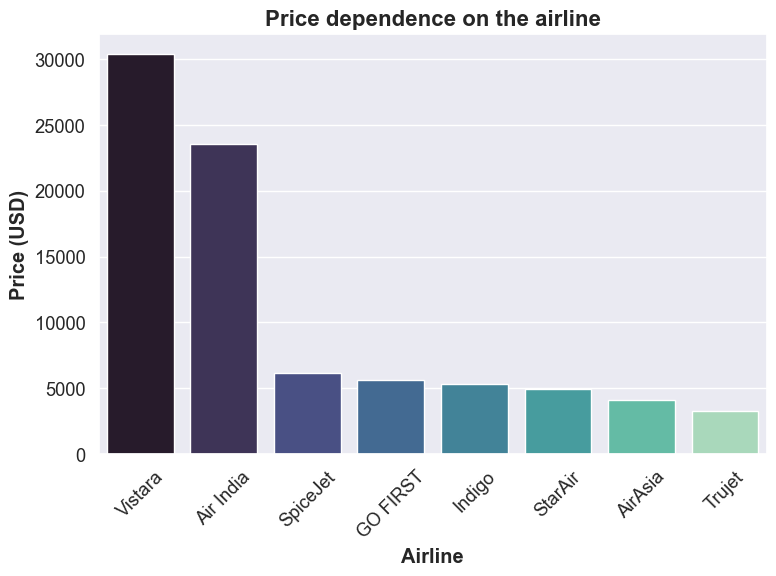

In [37]:
# Generate the figure
plt.figure(figsize= (8, 6))
sns.barplot(data= data.groupby('airline')['price_usd'].mean().sort_values(ascending=False), palette='mako')

# Customization
plt.title('Price dependence on the airline', fontsize= 16, fontweight = 'bold')
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Price (USD)')

# Export
plt.savefig('price_airline.png', bbox_inches='tight')


From this graph, we observe that, in general, the flight costs for the airlines 'Visitara' and 'Air India' are significantly higher than those of the others.

### Does ticket price change based on the departure time and arrival time?

C:\Users\mateo\AppData\Local\Temp\ipykernel_8696\3305491334.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = data['departure_time'].sort_values(), y= data['price_usd'], order= time_intervals, palette='deep', ax=ax1)
C:\Users\mateo\AppData\Local\Temp\ipykernel_8696\3305491334.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = data['arrival_time'].sort_values(), y= data['price_usd'], order= time_intervals, palette='Set2', ax=ax2)


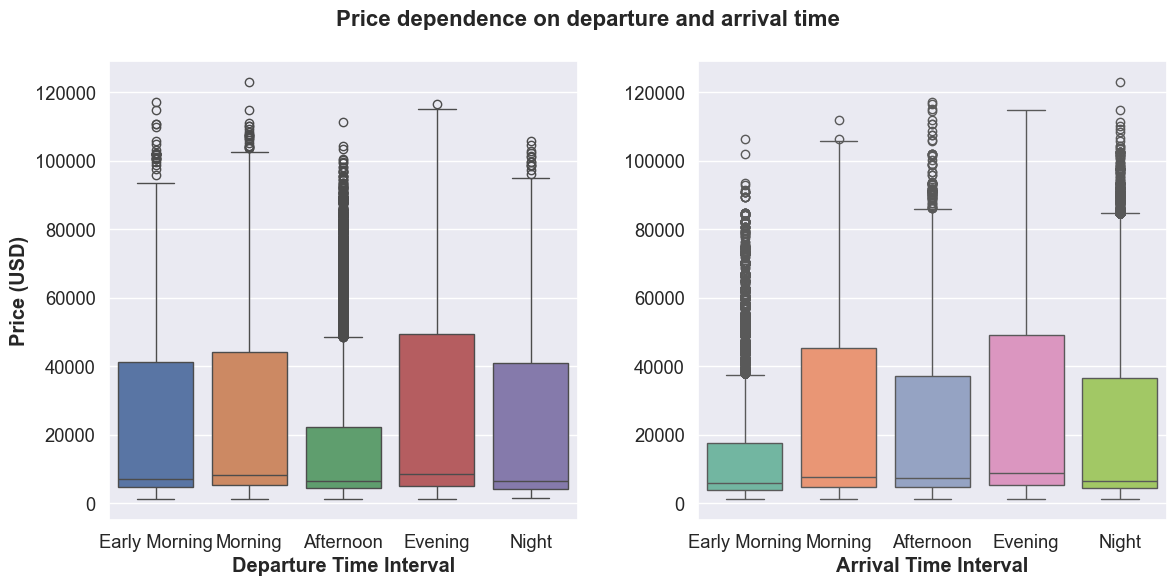

In [38]:
# We define the order as a categorical variable
time_intervals = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']

# Graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 6))
sns.boxplot(x = data['departure_time'].sort_values(), y= data['price_usd'], order= time_intervals, palette='deep', ax=ax1)
sns.boxplot(x = data['arrival_time'].sort_values(), y= data['price_usd'], order= time_intervals, palette='Set2', ax=ax2)

# Customization
plt.suptitle('Price dependence on departure and arrival time', fontsize= 16, fontweight = 'bold')
plt.tight_layout()
ax1.set_ylabel('Price (USD)')
ax1.set_xlabel('Departure Time Interval')
ax2.set_ylabel('')
ax2.set_xlabel('Arrival Time Interval')

# Export
plt.savefig('price_times.png', bbox_inches='tight')

If we analyze these two diagrams, we can see that, in general, there is not a significant variety of prices for the different time intervals, whether for departures or arrivals. It is worth noting that in the case of departures (left), we can observe that flights in the afternoon and evening tend to be slightly cheaper than the others. Consequently, for arrivals (right), we notice a similar decrease in the early morning and at night. However, the minimal differences and the large number of outliers in all cases indicate that we cannot definitively establish any time range for the best purchasing moment.

### How the price changes with change in Source and Destination?

C:\Users\mateo\AppData\Local\Temp\ipykernel_8696\2270103689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = data['source_city'], y = data['price_usd'], fill= True, linewidth= 0.7, palette= 'deep', order= data['source_city'].unique(), ax= ax1)
C:\Users\mateo\AppData\Local\Temp\ipykernel_8696\2270103689.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = data['destination_city'], y = data['price_usd'], fill= True, linewidth= 0.7, palette = 'Set2', order= data['source_city'].unique(), ax= ax2)


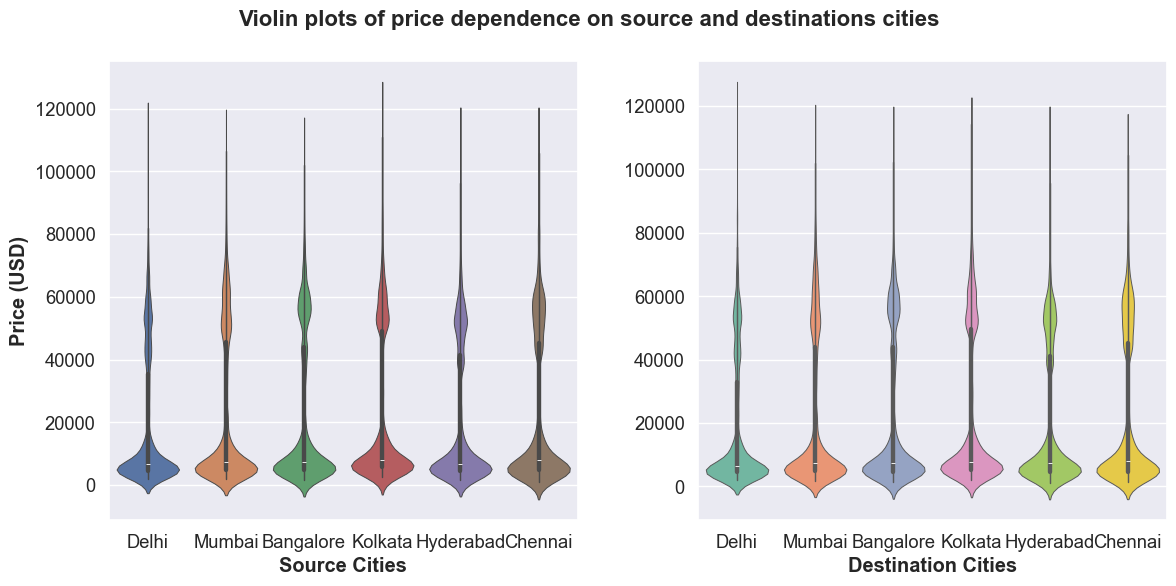

In [39]:
# Graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 6))
sns.violinplot(x = data['source_city'], y = data['price_usd'], fill= True, linewidth= 0.7, palette= 'deep', order= data['source_city'].unique(), ax= ax1)
sns.violinplot(x = data['destination_city'], y = data['price_usd'], fill= True, linewidth= 0.7, palette = 'Set2', order= data['source_city'].unique(), ax= ax2)

# Customization
plt.suptitle('Violin plots of price dependence on source and destinations cities', fontsize= 16, fontweight= 'bold')
plt.tight_layout()
ax1.set_ylabel('Price (USD)')
ax1.set_xlabel('Source Cities')
ax2.set_ylabel('')
ax2.set_xlabel('Destination Cities')

# Export
plt.savefig('price_cities.png', bbox_inches='tight')

From this violin plot, we can conclude that the origin or destination city is not a determining factor for the price itself. All destinations in both cases are associated with both expensive and cheap flights, indicating that it is not the city alone that determines the price, but rather the combinations of the various cities involved.

C:\Users\mateo\AppData\Local\Temp\ipykernel_8696\3277724152.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 5.953  5.953  5.956 ... 79.099 81.585 81.585]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_table.loc[:, 'price_usd'] = data_table['price_usd'] / 1000


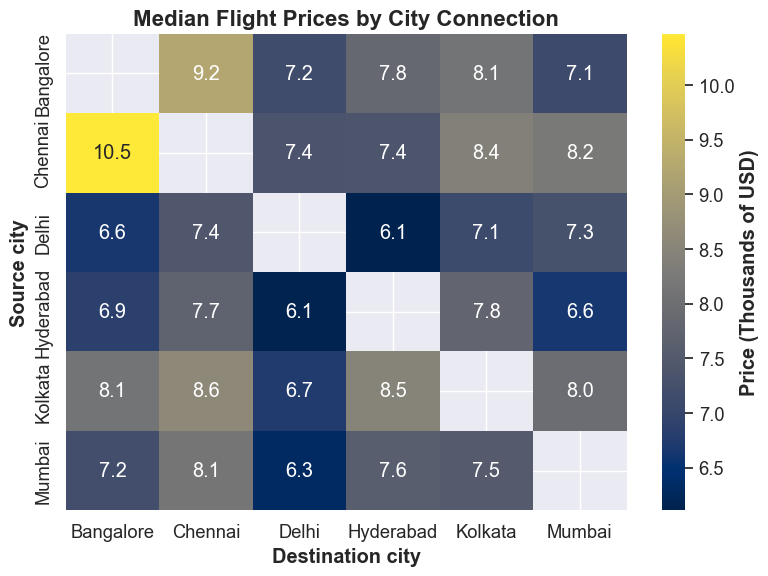

In [40]:
# Creating a pivot table
data_table = data[['source_city', 'destination_city', 'price_usd']]
data_table.loc[:, 'price_usd'] = data_table['price_usd'] / 1000

tabla_din = data_table.pivot_table(index = 'source_city', columns = 'destination_city', values = 'price_usd', aggfunc = 'median')

# Graph
plt.figure(figsize = (8, 6))
sns.heatmap(tabla_din, annot=True, fmt='.1f', cmap='cividis', cbar_kws={'label': 'Price (Thousands of USD)'})

# Customization
plt.title('Median Flight Prices by City Connection', fontsize = 16, fontweight= 'bold')
plt.xlabel('Destination city')
plt.ylabel('Source city')

# Export
plt.savefig('heatmap_cities.png', bbox_inches='tight')

In this heatmap, we can observe the cost of connections between cities. It is evident that the Delhi-Hyderabad connection is the cheapest, while the Chennai-Bangalore connection is the most expensive.

### Which is the price difference between classes?

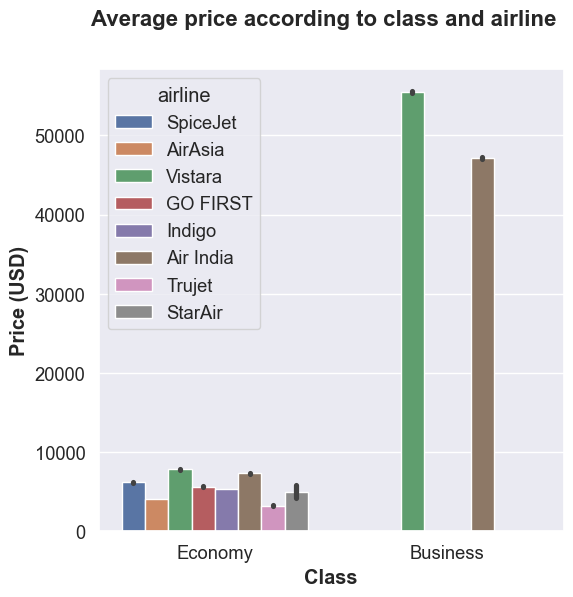

In [41]:
# Graph
plt.figure(figsize= (6, 6))
plt.tight_layout()
sns.barplot(data = data, x = 'class', y = 'price_usd', hue = 'airline')

# Customization
plt.suptitle('Average price according to class and airline', fontsize = 16, fontweight = 'bold')
plt.xlabel('Class')
plt.ylabel('Price (USD)')

# Export
plt.savefig('price_class.png', bbox_inches='tight')

In this bar chart we can see that the price is very dependent on the class for all airlines. These exceed 40,000 dollars for the business class while no economy class flight reaches 10,000 dollars. In addition, it can be seen that only the airlines 'Visitara' and 'Air India' have the business option.

### How are the number of stops and duration related to the price

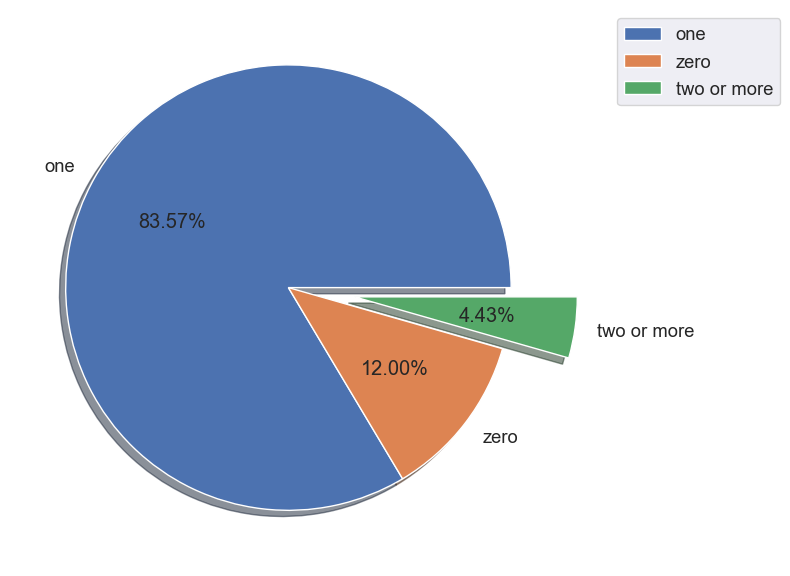

In [42]:
# Labels

labels = data.stops.value_counts().index

# Graph
plt.pie(data.stops.value_counts(), explode = (0, 0, 0.3), labels= labels, autopct= '%.2f%%', shadow= True)

# Legend
plt.legend(bbox_to_anchor= (1.4, 1), loc = 'upper right')

# Export
plt.savefig('stops_pie.png', bbox_inches='tight')

In this pie plot you can see that 83.17% of all flights make one stop (blue) while 12% make none (yellow) and the rest make more than one (green).

C:\Users\mateo\AppData\Local\Temp\ipykernel_8696\702760197.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  stop_price = sns.boxplot(data = data, x = 'stops', y = 'price_usd', palette= 'viridis')
C:\Users\mateo\AppData\Local\Temp\ipykernel_8696\702760197.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_stop_price = data.groupby("stops")["price_usd"].median().reset_index()


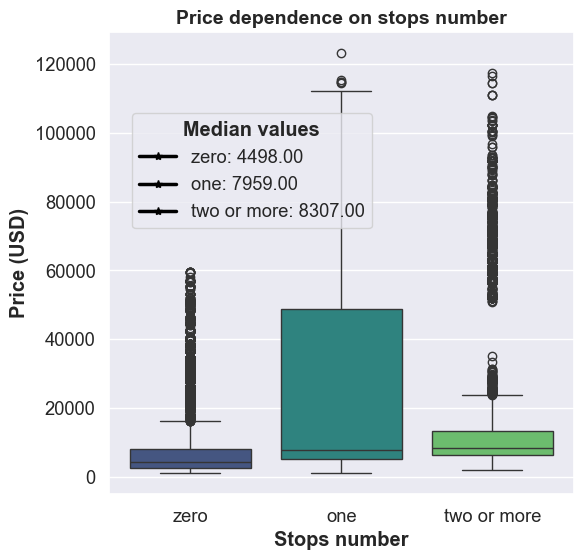

In [43]:
# Ordering 'stops' variable
order = ['zero', 'one', 'two or more']
data['stops'] = pd.Categorical(data['stops'], categories = order, ordered= True)

# Creating the figure
plt.figure(figsize = (6, 6))
plt.tight_layout()
stop_price = sns.boxplot(data = data, x = 'stops', y = 'price_usd', palette= 'viridis')

# Medians calculation 
median_stop_price = data.groupby("stops")["price_usd"].median().reset_index()
etiquetas_leyenda = [f'{stop}: {median:.2f}' for stop, median in zip(median_stop_price['stops'], median_stop_price['price_usd'])]

# Legend
for i, label in enumerate(etiquetas_leyenda):
    stop_price.plot([], [], marker='*', label=label, color='black')  

# Customization
stop_price.legend(bbox_to_anchor = (0.03, 0.7), loc="center left", frameon=True).set_title('Median values', prop = {'weight': 'bold'})
stop_price.set_title('Price dependence on stops number', fontsize = 14, fontweight = 'bold')
stop_price.set_xlabel('Stops number')
stop_price.set_ylabel('Price (USD)')

# Export
plt.savefig('price_stops.png', bbox_inches='tight')

Based on this representation, it is observed that, in general, flights with two or more stops are typically the most expensive. For flights with one stop, we can find more affordable prices, but the variability is very high, and there are prices across the entire range. In contrast, for non-stop flights, we find the best prices, minimal variability, and the number of outliers is practically half that of the previous cases, making this the preferred option when choosing a flight.

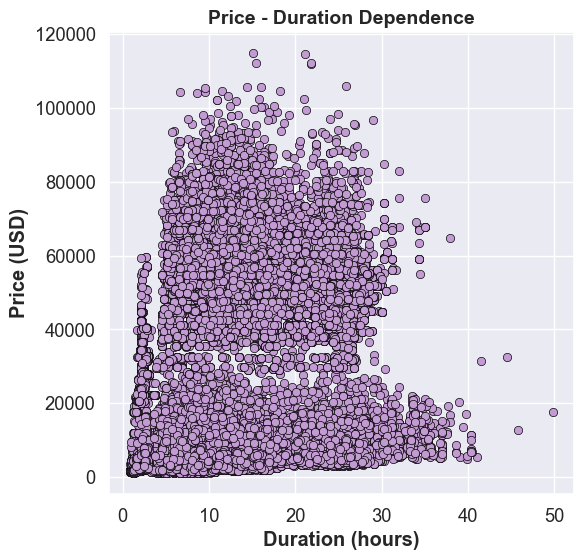

In [44]:
# A sample of 25% of the total dataframe is selected for processing
sample_data = data.sample(frac = 0.25)

# Graph
plt.figure(figsize = (6, 6))
plt.tight_layout()
sns.scatterplot(data = sample_data, x = 'duration', y = 'price_usd', color = '#c39bd3', edgecolor = 'black')

# Customization
plt.title('Price - Duration Dependence', fontsize = 14, fontweight = 'bold')
plt.xlabel('Duration (hours)')
plt.ylabel('Price (USD)')

# Export
plt.savefig('price_duration.png', bbox_inches='tight')

With this scatter plot, we observe that there is no clear relationship between flight duration and price.

Finally, let's check how the flight duration grows with the number of stops

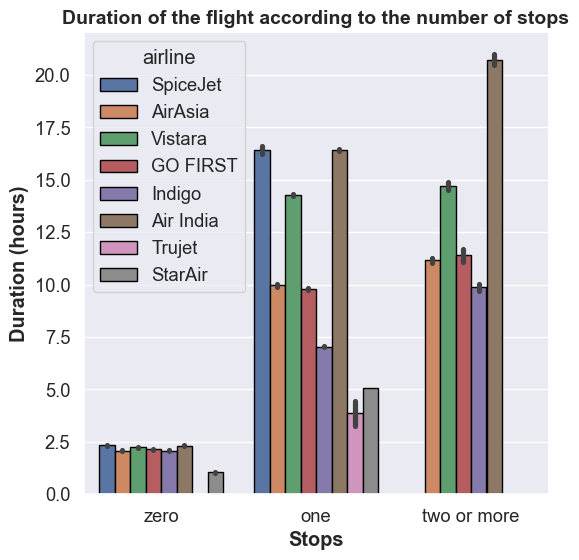

In [45]:
plt.figure(figsize=(6, 6))
plt.tight_layout()

sns.barplot(data = data, x = 'stops', y = 'duration', hue = 'airline', palette = 'deep', edgecolor = 'black')

plt.title('Duration of the flight according to the number of stops', fontsize = 14, fontweight = 'bold')
plt.xlabel('Stops')
plt.ylabel('Duration (hours)')

# Export
plt.savefig('stops_duration.png', bbox_inches='tight')

Here we can see that while non-stop flights generally do not exceed two and a half hours in any case, flights with one stop can reach up to 16 hours. However, some airlines like Trujet and StarAir often offer one-stop flights that are considerably shorter. In the case of two or more stops, we can observe a notable increase compared to the previous ones.

After this quick analysis, it has been confirmed that the price of flights does not have a strong relationship with the fields recorded here. However, it has been concluded that the price is determined by the connection between the source city and destination city, and that non-stop flights are considerably cheaper. Similarly, flying at midday and at night is the best time to find affordable flights.